In [1]:
#======================================================#
#     LAB 8-Classification MNIST using Neural Network  #
#     Author: SHIKHAR ASTHANA                          #
#     Roll No. : 2K22/AFI/24                           #
#     Subject: ANN Lab (Anil Singh Parihar Sir)        #
#======================================================#

In [2]:
#Import the header files
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import mnist

In [3]:
#Checking if GPU is compatible
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
#Loading MNIST Digit Dataset
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [5]:
#Reshaping data so that evry pixel value can be fed into the model
X_train = X_train.reshape(X_train.shape[0], 784)
X_val = X_val.reshape(X_val.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

In [6]:
#Scaling the pixel values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [7]:
#Building the model
#Currently only 1 hidden layer
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 85s 2ms/sample - loss: 0.3116 - accuracy: 0.9125 - val_loss: 0.2300 - val_accuracy: 0.9514
Epoch 2/10
48000/48000 [==============================] - 2s 50us/sample - loss: 0.1759 - accuracy: 0.9522 - val_loss: 0.2219 - val_accuracy: 0.9571
Epoch 3/10
48000/48000 [==============================] - 2s 49us/sample - loss: 0.1314 - accuracy: 0.9621 - val_loss: 0.2143 - val_accuracy: 0.9652
Epoch 4/10
48000/48000 [==============================] - 2s 49us/sample - loss: 0.1155 - accuracy: 0.9666 - val_loss: 0.2018 - val_accuracy: 0.9662
Epoch 5/10
48000/48000 [==============================] - 2s 48us/sample - loss: 0.0947 - accuracy: 0.9713 - val_loss: 0.2050 - val_accuracy: 0.9703
Epoch 6/10
48000/48000 [==============================] - 3s 52us/sample - loss: 0.0855 - accuracy: 0.9742 - val_loss: 0.2848 - val_accuracy: 0.9626
Epoch 7/10
48000/48000 [==============================] 

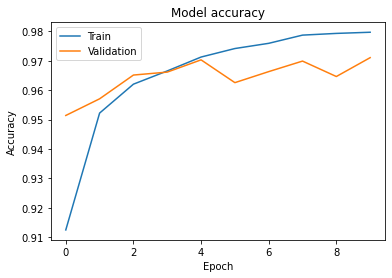

In [11]:
# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()